# Fourier inversion methods


Here I want to show how the characteristic function can be used to price derivatives.    
Sometimes it will be convenient to use this method, because for some stochastic processes the probability density function is not always known, or can have a quite complicated formula, while the characteristic function is frequently available.    
For Lévy processes, in particular, the characteristic function is always known, and is given by the Lévy-Kintchkine representation (see **A3**).    

I will present some examples in which I'm going to price European call options using the normal, the Merton and the Variance Gamma characteristic functions.  

For more information on this topic I suggest to have a look at [1].

## Contents
   - [Inversion theorem](#sec1)
   - [Numerical inversion](#sec2)
   - [Option pricing](#sec3)

In this notebook I will use a lot the **characteristic function** $\phi_{X}(\cdot)$ of the random variable $X$, defined by:

\begin{align}
\phi_{X}(u) &= \mathbb{E} \bigl[ e^{iuX} \bigr] \nonumber \\
            &= \int_{\mathbb{R}} e^{iux} f_X(x) dx.
\end{align}

where $f_X$ is the density of $X$.    
The characteristic function is nothing but the **Fourier transform** of $f_X$.    
Let us review some properties:
-  $\phi_{X}(u)$ always exists. This is because $\bigl| \int_{\mathbb{R}} e^{iux} f_X(x) dx \bigr| \leq \int_{\mathbb{R}} | e^{iux} f_X(x)| dx < \infty$.  Recall that $|e^{iux}|=1$ and $\int_{\mathbb{R}} |f_X(x)| dx = 1$.
-  $\phi_{X}(0) = 1$.
-  $\phi_{X}(u)^{*} = \phi_{X}(-u)$, where $*$ means complex conjugate.

The density function can be obtained by taking the **inverse Fourier transform**:

$$ f_X(x) = \frac{1}{2\pi} \int_{\mathbb{R}} e^{-iux} \phi_X(u) du $$

<a id='sec1'></a>
## Inversion theorem

Let us consider the following representation of the cumulative density function:

\begin{align*}
F_X(x) &= \mathbb{P}(X<x) = \int_{-\infty}^x f_X(t) dt \\
       &= \frac{1}{2} - \frac{1}{2\pi} \int_{\mathbb{R}} \frac{e^{-iux} \phi_X(u)}{iu} du 
\end{align*}

By taking the derivative of $F_X$, you can check that it gives the expression for $f_X$.

But.... How to obtain this formula?

I think this is a quite interesting topic, so... I present the proof.    (for more information have a look at [2])

#### Proof - step 1

Let us consider the sign function [wiki](https://en.wikipedia.org/wiki/Sign_function),
$$ sgn(x) =  \begin{cases}
 -1 &=  x<0 \\
 0  &=  x=0 \\
 1  &=  x>0.
\end{cases} $$

The step function has Fourier transform equal to 
$$\mathcal{F}[sgn(x)] = \frac{2}{iu}$$ 
(intended as the [Cauchy principal value](https://en.wikipedia.org/wiki/Cauchy_principal_value) ).

In order to prove it, let us consider the function

$$ g_a(x) =  \begin{cases}
 -e^{ax} &=  x<0 \\
 0  &=  x=0 \\
 e^{-ax}  &=  x>0.
\end{cases} $$

with $a>0$. When $a \to 0$, the function $g_a(x)$ converges to $sgn(x)$.

The Fourier transform of $g_a$ can be computed easily by splitting the integral in two (if you are lazy, have a look at the table [here](https://en.wikipedia.org/wiki/Fourier_transform#Square-integrable_functions,_one-dimensional)):

\begin{align*}
\mathcal{F}[g_a(x)] &= \frac{1}{a+iu} - \frac{1}{a-iu} \\
                  &= - \frac{2iu}{a^2 + u^2}  
\end{align*}

We can send $a\to 0$ and obtain the relation we were looking for.


#### Proof - step 2

The convolution of the density function $f_X$ with the sign function is given by:

\begin{align*}
(f_X * sgn)(x) &= \int_{-\infty}^{\infty} f_X(x+t) \, sgn(t) \, dt \\
               &= \int_{-\infty}^{0} f_X(x+t) \, (-1) dt + \int_{0}^{\infty} f_X(x+t)\, (1) dt \\
               &= - F_X(x) + 1 - F_X(x) \\
               &= 1 - 2 F_X(x)
\end{align*}


#### Proof - step 3

By the convolution theorem [wiki](https://en.wikipedia.org/wiki/Convolution_theorem) we know that:

$$ (f_X * sgn) = \mathcal{F}^{-1} \, \biggl[ \mathcal{F}[f_X] \cdot \mathcal{F}[sgn] \biggr] $$

Therefore we have that 

\begin{align*}
  (f_X * sgn)(x) &= \frac{1}{2\pi} \int_{\mathbb{R}} e^{-iux} \phi_X(u) \cdot \frac{2}{iu} \, du
\end{align*}

#### Proof - conclusion

We can put together the steps 2 and 3:

$$ 1 - 2 F_X(x) = \frac{1}{2\pi} \int_{\mathbb{R}} e^{-iux} \phi_X(u) \cdot \frac{2}{iu} \, du $$

Rearranging the terms, we can conclude the proof:

$$ F_X(x) = \frac{1}{2} - \frac{1}{2\pi} \int_{\mathbb{R}} e^{-iux} \phi_X(u) \cdot \frac{1}{iu} \, du $$

### Gil Pelaez formulas

Recall that for a complex number z,

$$ Re[z] = \frac{z+z^*}{2}  \quad \quad Im[z] = \frac{z-z^*}{i2} $$

Starting from the inversion formula, **Gil Pelaez** obtained the following expression:

\begin{align*}
  F_X(x) &= \frac{1}{2} - \frac{1}{2\pi} \int_{\mathbb{R}} e^{-iux} \phi_X(u) \cdot \frac{1}{iu} \, du \\
         &= \frac{1}{2} - \frac{1}{2\pi} \int_{-\infty}^0 e^{-iux} \phi_X(u) \frac{1}{iu} \, du
              + \frac{1}{2\pi} \int_0^{\infty} e^{-iux} \phi_X(u) \frac{1}{iu} \, du \\
         &= \frac{1}{2} - \frac{1}{2\pi} \int_0^{\infty} \biggl(-e^{iux} \phi_X(-u) + e^{-iux} \phi_X(u) \biggr) \frac{1}{iu} \, du \\
         &= \frac{1}{2} - \frac{1}{\pi} \int_0^{\infty} \frac{Im[ e^{-iux} \phi_X(u) ]}{u} du
\end{align*}

This formula can also be written as:

$$ F_X(x) = \frac{1}{2} - \frac{1}{\pi} \int_0^{\infty} Re\biggl[ \frac{ e^{-iux} \phi_X(u)}{iu} \biggr] du $$

We obtain the expression for the density by taking the derivative:

$$ f_X(x) = \frac{1}{\pi} \int_0^{\infty} Re\biggl[ e^{-iux} \phi_X(u) \biggr] du $$

### Pricing formula by Fourier inversion

In the notebook **1.1** we found that the pricing formula for a call option with stike K and maturity T is: 

$$  C(S_t,K,T) = S_t \tilde{\mathbb{Q}} ( S_T > K ) - e^{-r(T-t)} K \, \mathbb{Q}( S_T >K ) $$

where $\tilde{\mathbb{Q}}$ is the probability under the stock numeraire and $\mathbb{Q}$ is the probability under the money market numeraire.

#### This formula is model independent! 

When the stock follows a geometric Brownian motion, this formula corresponds to the Black-Scholes formula.

Now let us express $\tilde{\mathbb{Q}}$ and $\mathbb{Q}$ in terms of the characteristic function using the Gil Pelaez formula.    
Let us call $k = \log \frac{K}{S_t}$ and $S_T = S_t e^{X_T}$
- For $\mathbb{Q}$ we can write: 

\begin{align*}
\mathbb{Q}(S_T >K) &= 1 - \mathbb{Q}(S_T <K) = 1 - \mathbb{Q}(X_T < k) \\
                   &= \frac{1}{2} + \frac{1}{\pi} \int_0^{\infty} Re\biggl[ \frac{ e^{-iuk} \phi_X(u)}{iu} \biggr] du
\end{align*}

- In the same way, for $\tilde{\mathbb{Q}}$, we can write: 

\begin{align*}
\tilde{\mathbb{Q}}(S_T >K) &= \frac{1}{2} + \frac{1}{\pi} \int_0^{\infty} Re\biggl[ \frac{ e^{-iuk} \tilde{\phi}_X(u)}{iu} \biggr] du \\
                          &= \frac{1}{2} + \frac{1}{\pi} \int_0^{\infty} Re\biggl[ \frac{ e^{-iuk} \phi_X(u-i)}{iu \, \phi_X(-i)} \biggr] du  
\end{align*}

where

\begin{align*}
 \tilde{\phi}_X(u) &= \mathbb{E}^{\tilde{\mathbb{Q}}} \bigl[ e^{iuX_T} \bigr] = \mathbb{E}^{\mathbb{Q}} \biggl[ \frac{d\tilde{\mathbb{Q}}}{d \mathbb{Q}} e^{iuX_T} \biggr] \\  
                   &= \mathbb{E}^{\mathbb{Q}} \biggl[ \frac{S_t e^{X_T}}{S_t \mathbb{E}^\mathbb{Q}[e^{X_T}]} e^{iuX_T} \biggr] \\
                   &= \mathbb{E}^{\mathbb{Q}} \biggl[ \frac{e^{(iu+1)X_T}}{\phi_X(-i)} \biggr] \\
                   &= \frac{\phi_X(u-i)}{\phi_X(-i)}
\end{align*}


(see the notebook **1.1** for a discussion about this change of measure).

<a id='sec2'></a>
## Numerical inversion


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.integrate import quad
from functools import partial

In [6]:
def cf_normal(u, mu=1, sig=2):
    return np.exp( 1j * u * mu - 0.5 * u**2 * sig**2 )

In [12]:
def cf_gamma(u, a=1, b=2):
    return (1 - b * u * 1j)**(-a) 

In [13]:
def cf_poisson(u, lam=1):
    return np.exp( lam * (np.exp(1j * u) -1) ) 

Let us consider the following characteristic functions:

##### Normal:
$\mathcal{N}(\mu,\sigma^2)$, $\sigma>0$.
$$ \phi_N(u) = e^{i\mu u - \frac{1}{2}\sigma^2 u^2} $$
##### Gamma (shape-scale parametrization) 
$\Gamma(a,b)$, $a,b >0$.
$$ \phi_G(u) = (1-ibu)^{-a} $$
##### Poisson
$Po(\lambda)$, $\lambda>0$.
$$ \phi_P(u) = e^{\lambda (e^{iu}-1)} $$

I want to check if the Gil Pelaez formula works:

In [14]:
# Gil Pelaez formula for the density
# right_lim is the right extreme of integration
# cf is the characteristic function

def Gil_Pelaez_pdf(x, cf, right_lim):               
    integrand = lambda u: np.real( np.exp(-u*x*1j) * cf(u) )
    return 1/np.pi * quad(integrand, 1e-15, right_lim )[0]

### Normal

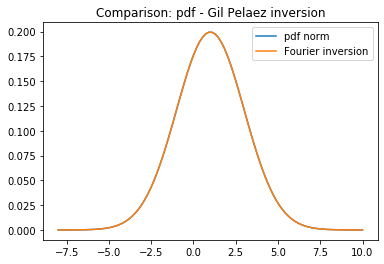

In [15]:
x = np.linspace(-8,10,100)

plt.plot(x,ss.norm.pdf(x, loc=1, scale=2), label="pdf norm")
plt.plot(x,[Gil_Pelaez_pdf(i,cf_normal,np.inf) for i in x], label="Fourier inversion" )
plt.title("Comparison: pdf - Gil Pelaez inversion"); plt.legend()
plt.show()

### Gamma

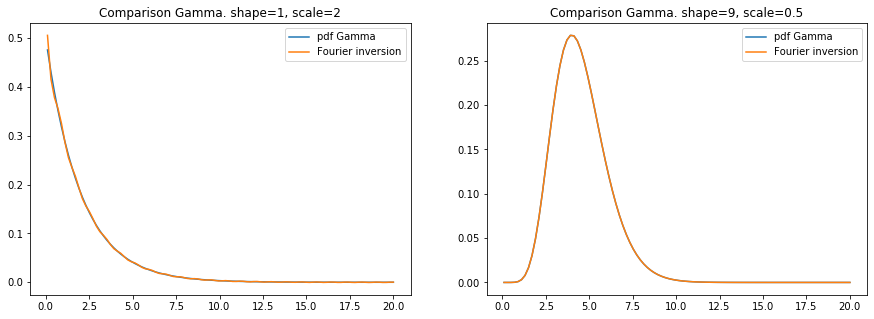

In [16]:
xx = np.linspace(0.1,20,100)
a = 1     #shape parameter
b = 2     #scale parameter
c = 9     #shape parameter
d = 0.5   #scale parameter

lim_ab = 24
lim_cd = np.inf
cf_gamma_ab = partial(cf_gamma, a=a, b=b)   # function binding 
cf_gamma_cd = partial(cf_gamma, a=c, b=d)   # function binding 

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(xx,ss.gamma.pdf(xx, a, scale=b), label="pdf Gamma")
ax1.plot(xx,[Gil_Pelaez_pdf(i,cf_gamma_ab, lim_ab) for i in xx], label="Fourier inversion" )
ax1.set_title("Comparison Gamma. shape=1, scale=2"); ax1.legend()
ax2.plot(xx,ss.gamma.pdf(xx,c, scale=d), label="pdf Gamma")
ax2.plot(xx,[Gil_Pelaez_pdf(i,cf_gamma_cd, lim_cd) for i in xx], label="Fourier inversion" )
ax2.set_title("Comparison Gamma. shape=9, scale=0.5"); ax2.legend()
plt.show()

#### Comments:

If you try to increase the value of `lim_ab = 24`, you will see that python will raise:     
`IntegrationWarning: The maximum number of subdivisions (50) has been achieved.`

When we solve this kind of problems we have to be careful, and analyze them case by case.

For $c=9$ and $d=0.5$, we could set `lim_cd = np.inf` because the integrand has a good behavior.    
But for $a=1$ and $b=2$ the integrand is not so nice. There are many oscillations (originated by the term $e^{-iux}$) that create the problem.

Let's have a look at the plot of the integrands: (at the point x=3)

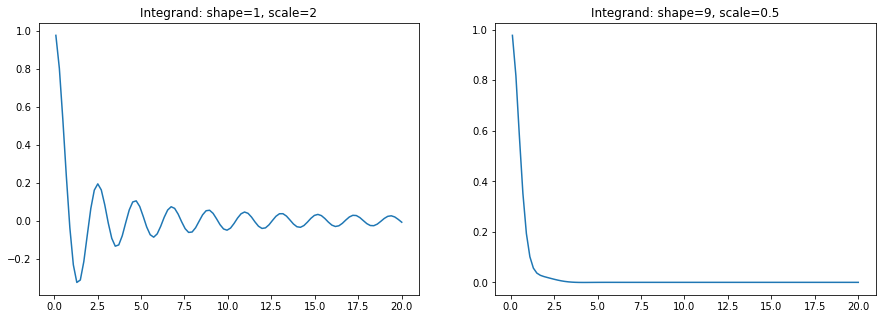

In [17]:
u = np.linspace(0.1,20,100)
x = 3
f = lambda u: np.real( np.exp(-u*x*1j) * cf_gamma_ab(u) )  # integrand
g = lambda u: np.real( np.exp(-u*x*1j) * cf_gamma_cd(u) )

fig = plt.figure(figsize=(15,5)); ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(u, f(u)); ax1.set_title("Integrand: shape=1, scale=2")
ax2.plot(u, g(u)); ax2.set_title("Integrand: shape=9, scale=0.5")
plt.show()

### Poisson

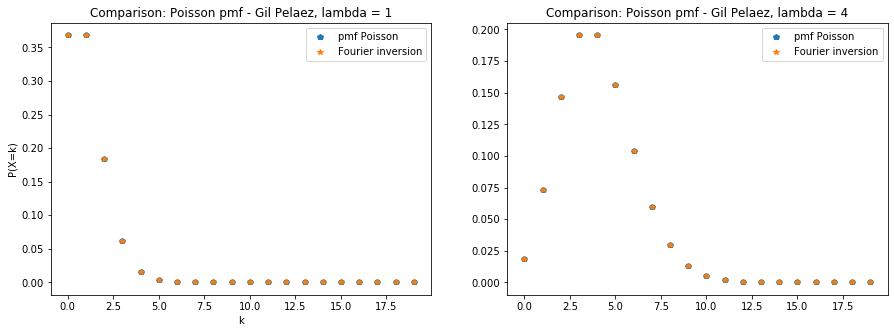

In [18]:
k = np.array(range(20))
lam = 4
cf_poisson4 = partial(cf_poisson, lam=lam)   # function binding to lam=4

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(k, ss.poisson.pmf(k, 1), linestyle="None", marker='p', label="pmf Poisson")  # with lam=1 
ax1.plot(k, [Gil_Pelaez_pdf(i,cf_poisson, np.pi) for i in k], \
         linestyle="None", marker='*', label="Fourier inversion" )      # lam=1 by default
ax1.set_xlabel("k"); ax1.set_ylabel("P(X=k)")
ax1.set_title("Comparison: Poisson pmf - Gil Pelaez, lambda = 1"); ax1.legend()

ax2.plot(k, ss.poisson.pmf(k, lam), linestyle="None", marker='p', label="pmf Poisson")
ax2.plot(k, [Gil_Pelaez_pdf(i,cf_poisson4, np.pi) for i in k], \
         linestyle="None", marker='*', label="Fourier inversion" )
ax2.set_title("Comparison: Poisson pmf - Gil Pelaez, lambda = 4"); ax2.legend()
plt.show()

##### Comments:

In this case, we considered only the integration in the region $[0,\pi]$.

As you can see in the plots below, the integrand is an even periodic function. Therefore, if we had integrated on $[0,\infty]$ the integral would have been infinite.

The two plots below consider the characteristic function with $\lambda=1$.     
The integrands inside the `Gil_Pelaez_pdf` function are functions of $u$ with fixed values of $x$. For this exaple I chose x=1 and x=10 ($x$ corresponds to $k$ in the plots above).     
The characteristic function of a Poisson random variable does not have a damping factor. It is a pure periodic function. For this reason it is helpful to define it only on $[-\pi,\pi]$.    
The integrand of the Gil Pelaez function simply inherits these features.

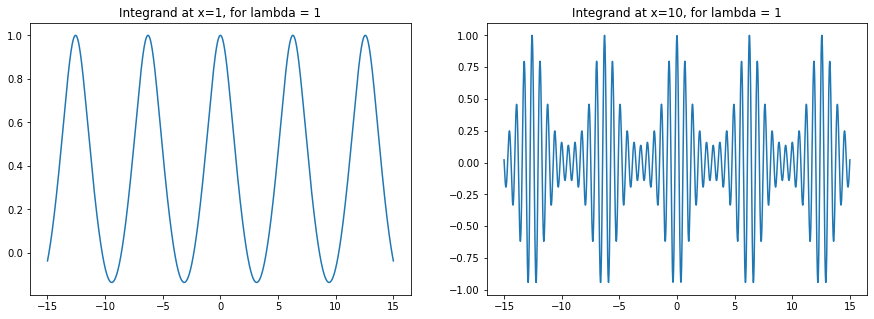

In [19]:
X1 = 1; X2 = 10
y = np.linspace(0.-15,15,2000)
ff = lambda u: np.real( np.exp(-u*X1*1j) * cf_poisson(u) )  # integrand
gg = lambda u: np.real( np.exp(-u*X2*1j) * cf_poisson(u) )  # integrand

fig = plt.figure(figsize=(15,5)); ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(y, ff(y)); ax1.set_title("Integrand at x=1, for lambda = 1")
ax2.plot(y, gg(y)); ax2.set_title("Integrand at x=10, for lambda = 1")
plt.show()

<a id='sec3'></a>
## Option pricing

Let us apply the pricing formula introduced above to the processes:
- Geometric Brownian motion
- Merton process
- Variance Gamma process

These processes will be described better in the next notebooks. If you are not familiar with these concepts, have a look at the Appendix **A3**. Otherwise you can skip this part, for now. And come back again after having read the relevant notebooks.

First, I have to implement $\mathbb{Q}$ and $\tilde{\mathbb{Q}}$:

In [12]:
def Q1(k, cf, right_lim):
    integrand = lambda u: np.real( (np.exp(-u*k*1j) / (u*1j)) * 
                                  cf(u-1j) / cf(-1j) )  
    return 1/2 + 1/np.pi * quad(integrand, 1e-15, right_lim )[0]

In [3]:
def Q2(k, cf, right_lim):
    integrand = lambda u: np.real( np.exp(-u*k*1j) /(u*1j) * cf(u) )
    return 1/2 + 1/np.pi * quad(integrand, 1e-15, right_lim )[0]

In the following, I present European call option values, with the following parameters:

In [8]:
S0 = 100.0      # spot stock price
K = 100.0       # strike 
T = 1           # maturity
k = np.log(K/S0)  # log moneyness

### Geometric Brownian motion

In [4]:
from functions.BS_pricer import BS_pricer

r = 0.1         # risk free rate  
sig = 0.2       # volatility 

In [13]:
cf_GBM = partial(cf_normal, mu=( r - 0.5 * sig**2 )*T, sig=sig*np.sqrt(T))     # function binding
call = S0 * Q1(k, cf_GBM, np.inf) - K * np.exp(-r*T) * Q2(k, cf_GBM, np.inf)   # pricing function

print("Fourier inversion call: ",call)
print("Closed formula call: ", BS_pricer.BlackScholes("call",S0,K,T,r,sig))

Fourier inversion call:  13.2696765846609
Closed formula call:  13.269676584660893


### Merton process

In [25]:
# characteristic function of the Merton process at time t

def cf_mert(u, t=1, mu=1, sig=2, lam=0.8, muJ=0, sigJ=0.5):
    return np.exp( t * ( 1j * u * mu - 0.5 * u**2 * sig**2 \
                  + lam*( np.exp(1j*u*muJ - 0.5 * u**2 * sigJ**2) -1 ) ) )

In [26]:
# This code just creates the object that we use to call the Merton closed formula
from functions.Parameters import Option_param
from functions.Processes import Merton_process
from functions.Merton_pricer import Merton_pricer

opt_param = Option_param(S0=100, K=100, T=1, exercise="European", payoff="call" )
Merton_param = Merton_process(r=0.1, sig=0.2, lam=0.8, muJ=0, sigJ=0.5)
Merton = Merton_pricer(opt_param, Merton_param)

r=0.1      # risk free rate 
sig=0.2    # diffusion coefficient
lam=0.8    # jump activity
muJ=0      # jump mean size 
sigJ=0.5   # jump std deviation
m = lam * (np.exp(muJ + (sigJ**2)/2) -1)     # martingale correction

In [27]:
# function binding
cf_Mert = partial(cf_mert, t=T, mu=( r - 0.5 * sig**2 -m ), sig=sig, lam=lam, muJ=muJ, sigJ=sigJ ) 

# call price
call = S0 * Q1(k, cf_Mert, np.inf) - K * np.exp(-r*T) * Q2(k, cf_Mert, np.inf)   # pricing function

print("Fourier inversion call: ", call)
print("Closed formula call: ", Merton.closed_formula() )

Fourier inversion call:  22.0163676219057
Closed formula call:  22.016367621905697


### Variance Gamma

In [28]:
# characteristic function of the VG process at time t, with an additional drift mu

def cf_VG(u, t=1, mu=0, theta=-0.1, sigma=0.2, kappa=0.1):
    return np.exp( t * ( 1j*mu*u - np.log(1 - 1j*theta*kappa*u + 0.5*kappa*sigma**2 * u**2 ) /kappa  ) )

In [29]:
# I import some modules in order to call the Monte Carlo pricer
from functions.Processes import VG_process
from functions.VG_pricer import VG_pricer

# Creates the object with the parameters of the process
VG_param = VG_process(r=0.1, sigma=0.2, theta=-0.1, kappa=0.1)
# Creates the VG process
VG = VG_pricer(opt_param, VG_param)

theta = -0.1; sigma = 0.2; kappa = 0.1          # VG parameters 
w = -np.log(1 - theta * kappa - kappa/2 * sigma**2 ) /kappa    # martingale correction w

In [30]:
# function binding
cf_VG_b = partial(cf_VG, t=T, mu=r-w, theta=theta, sigma=sigma, kappa=kappa ) 

# call price
call = S0 * Q1(k, cf_VG_b, np.inf) - K * np.exp(-r*T) * Q2(k, cf_VG_b, np.inf)   # pricing function

print("Fourier inversion call: ", call.round(6))
print("Monte Carlo call: {0:.6f} with standard error: {1:.6f} ".format(*VG.MC(N=50000000, Err=True) ) )

Fourier inversion call:  13.314022
Monte Carlo call: 13.311236 with standard error: 0.002252 


The closed formula for the VG price is also available, but it is not very reliable (it has a negative bias).  See also the comments in the notebook **3.2**.       
For this reason I prefer to compare the Fourier inversion price with the Monte Carlo price!

## References

[1] Martin Schmelze (2010), Option Pricing Formulae using Fourier Transform: Theory and Application. 

[2] N.G. Shephard (1991), "From characteristic function to distribution function, a simple framework for the theory", Econometric Theory, 7, 519-529.